#### 결정트리 알고리즘 기반 모델
 - 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
 - 질문방식으로 Yes/No 결과에 따라 데이터셋 분리
 - 장점 : 스케일링, 정규화 불필요 ==> 하고싶으면 해도 되지만 성능에 영향을 안줌, 쉬운 알고리즘
 - 단점 : 과대적합 ==> 과대적합 해결을 위한 많은 하이퍼파라미터 존재
 - 다른 ML 알고리즘에 비해 성능이 좋지 않음
 - 여러개의 decision Tree가 모이면 성능 강해짐
   * 앙상블에 주로 사용됨

[1] 모듈로딩 및 데이터 준비

In [1]:
# 모듈로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris


In [2]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(featureDF.shape, featureDF.ndim)
print(targetSR.shape, targetSR.ndim)
print(targetSR.unique)

(150, 4) 2
(150,) 1
<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32>


[2] 학습용 데이터셋 준비


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(featureDF,targetSR,
                                                    random_state=10,
                                                    stratify=targetSR)

In [4]:
print(X_train.shape, X_train.ndim)
print(X_test.shape, X_test.ndim)

print(y_train.shape, y_train.ndim)
print(y_test.shape, y_test.ndim)


(112, 4) 2
(38, 4) 2
(112,) 1
(38,) 1


[3] 학습 - 기본 학습

In [5]:
# 모델 인스턴스 생성
DT= DecisionTreeClassifier(random_state=10)

# 학습 fit
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [6]:
# 모델 파라미터 확인 : 학습(fit) 후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'DT.classes_ : {DT.classes_}')
print(f'DT.n_classes_ : {DT.n_classes_}')
print(f'DT.max_features_: {DT.max_features_}')
print(f'DT.feature_importances_: {DT.feature_importances_}')
print(f'DT.feature_names_in_: {DT.feature_names_in_}')

DT.classes_ : [0 1 2]
DT.n_classes_ : 3
DT.max_features_: 4
DT.feature_importances_: [0.03125249 0.         0.06844775 0.90029976]
DT.feature_names_in_: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


#### 성능 체크

In [7]:
# 학습용 데이터셋에 대한 성능 : score
train_score = DT.score(X_train,y_train)

# 테스트 데이터셋에 대한 성능
test_score = DT.score(X_test,y_test)

In [8]:
print(f'train_score : {train_score}')
print(f'test_score : {test_score}')

train_score : 1.0
test_score : 1.0


[4] 교차 검증
 - 데이터셋이 너무 적어서 과대적합이 나온다면 cross_validate 사용

In [9]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# 교차 검증 준비 ==> 모델 인스턴스 생성, trainDS, cv=5(default)
DT_model = DecisionTreeClassifier()
val = cross_validate(DT_model, X_train, y_train,
               return_estimator=True,
               return_train_score=True
               )

valDF = pd.DataFrame(val)
valDF

,fit_time,score_time,estimator,test_score,train_score
0,0.019363,0.000000,DecisionTreeClassifier(),0.956522,1.0
1,0.000000,0.000000,DecisionTreeClassifier(),0.956522,1.0
2,0.004771,0.000000,DecisionTreeClassifier(),1.000000,1.0
3,0.000000,0.012951,DecisionTreeClassifier(),0.863636,1.0
4,0.000550,0.000000,DecisionTreeClassifier(),0.909091,1.0


[5] 성능 향상 위한 튜닝 ==> 하이퍼 파라미터 설정
 - 단점 : 과대적합
 - 제어 요소
   * max_depth, min_samples_leaf,...

In [10]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 dit 생성
params = {'max_depth':[4,3,2,1],
          'min_samples_leaf':[5,3,2]} 

In [11]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params, refit=True)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]})

In [12]:
# 모델 파라미터 확인

print(f'grid.best_params : {grid.best_params_}')
print(f'grid.best_score_ : {grid.best_score_}')
print(f'grid.best_estimator_ : {grid.best_estimator_}')
print(f'grid.cv_results_ : {grid.cv_results_}')

cv_resultDF = pd.DataFrame(grid.cv_results_)

grid.best_params : {'max_depth': 4, 'min_samples_leaf': 2}
grid.best_score_ : 0.9371541501976285
grid.best_estimator_ : DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
grid.cv_results_ : {'mean_fit_time': array([0.00389886, 0.00316515, 0.00560884, 0.00258393, 0.00090384,
       0.00315437, 0.00312486, 0.0042275 , 0.        , 0.        ,
       0.00494752, 0.00718765]), 'std_fit_time': array([0.00605193, 0.00565547, 0.00687652, 0.00060817, 0.0011086 ,
       0.00630875, 0.00624971, 0.00583219, 0.        , 0.        ,
       0.00642146, 0.00730999]), 'mean_score_time': array([0.00081248, 0.00034871, 0.00049357, 0.00182991, 0.00070605,
       0.        , 0.        , 0.00210729, 0.0079175 , 0.00616508,
       0.        , 0.00028901]), 'std_score_time': array([0.00162497, 0.00069742, 0.00098715, 0.00083383, 0.00087668,
       0.        , 0.        , 0.0026249 , 0.00700955, 0.00755507,
       0.        , 0.00057802]), 'param_max_depth': masked_array(data=[4, 4, 4, 3, 3, 3, 2, 2, 2, 1

In [13]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

 - 주요 피쳐 시각화

In [14]:
import matplotlib.pyplot as plt

## 가장 좋은 모델
best_model =  grid.best_estimator_

In [15]:
# 피쳐 중요도 및 개수
x= best_model.feature_importances_ 
y = best_model.n_features_in_
x

array([0.01321873, 0.        , 0.59964451, 0.38713677])

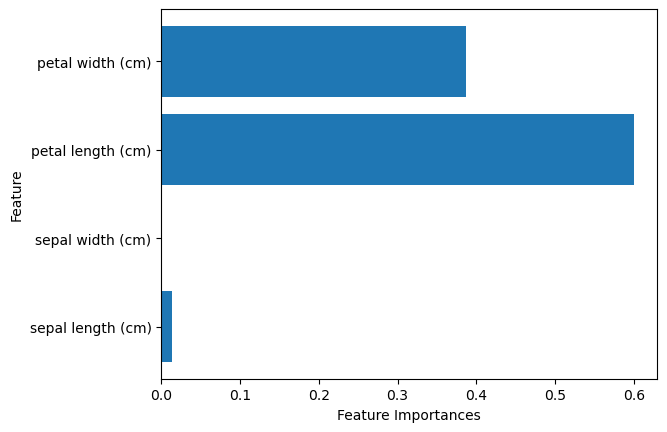

In [16]:
plt.barh(range(best_model.n_features_in_),best_model.feature_importances_ ,align='center')
plt.yticks(np.arange(best_model.n_features_in_),best_model.feature_names_in_)
plt.xlabel('Feature Importances')
plt.ylabel('Feature')
plt.show()

 - DT 그래프 시각화
   * graphviz 프로그램 설치 + python용 패키지 graphviz 설칯ㅊ치ㅣ치칯

In [17]:
## (1) DT 모델을 dot 포맷의 파일로 저장 ==? export_graphviz()
from sklearn.tree import export_graphviz

export_graphviz(best_model,out_file='tree.dot',
                class_names=['setosa','versicolor','virginica'],feature_names=best_model.feature_names_in_,
                impurity=True, filled=True)


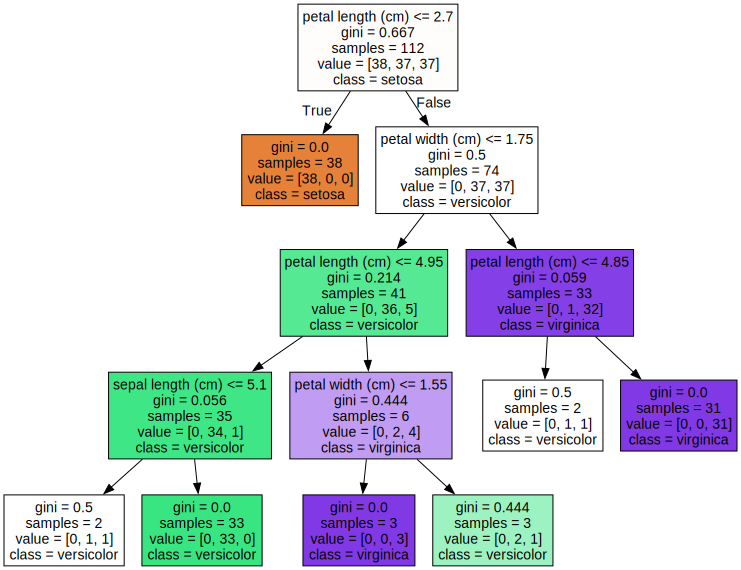

In [18]:
## (2) dot파일 출력
import graphviz

# 파일에서 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[6] 새로운 데이터 예측

In [22]:
new_data = featureDF.iloc[[0]]+0.21
new_data.shape

(1, 4)

In [23]:
best_model.predict(new_data)

array([0])

In [24]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])